# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

In [3]:
# ===========================
# Parcial: Random Forest - Predicción de precio de automóviles
# ===========================

# Celda 0 - Instalación de librerías (ejecutar solo si faltan)
!pip install scikit-learn seaborn --quiet
print("Librerías instaladas correctamente.")



Librerías instaladas correctamente.


"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


📂 Archivo detectado dentro del ZIP: dataTrain_carListings/dataTrain_carListings.csv

🔎 Valores nulos antes de imputar:

Price              0
Year               0
Mileage            0
Model_Camry        0
Model_Camry4dr     0
Model_CamryBase    0
Model_CamryL       0
Model_CamryLE      0
Model_CamrySE      0
Model_CamryXLE     0
dtype: int64

📊 Estadísticas descriptivas:



,count,mean,std,min,25%,50%,75%,max
Price,10495.0,14538.403716,3922.420961,5002.0,11999.0,15000.0,16999.0,32444.0
Year,10495.0,2013.553883,3.116585,1998.0,2012.0,2014.0,2016.0,2018.0
Mileage,10495.0,52509.430395,36791.736601,5.0,26461.0,41680.0,71355.5,232658.0
Model_Camry,10495.0,0.056313,0.230535,0.0,0.0,0.0,0.0,1.0
Model_Camry4dr,10495.0,0.158456,0.365186,0.0,0.0,0.0,0.0,1.0
Model_CamryBase,10495.0,0.012292,0.110189,0.0,0.0,0.0,0.0,1.0
Model_CamryL,10495.0,0.048213,0.214227,0.0,0.0,0.0,0.0,1.0
Model_CamryLE,10495.0,0.236494,0.424949,0.0,0.0,0.0,0.0,1.0
Model_CamrySE,10495.0,0.376370,0.484498,0.0,0.0,0.0,1.0,1.0
Model_CamryXLE,10495.0,0.111863,0.315213,0.0,0.0,0.0,0.0,1.0


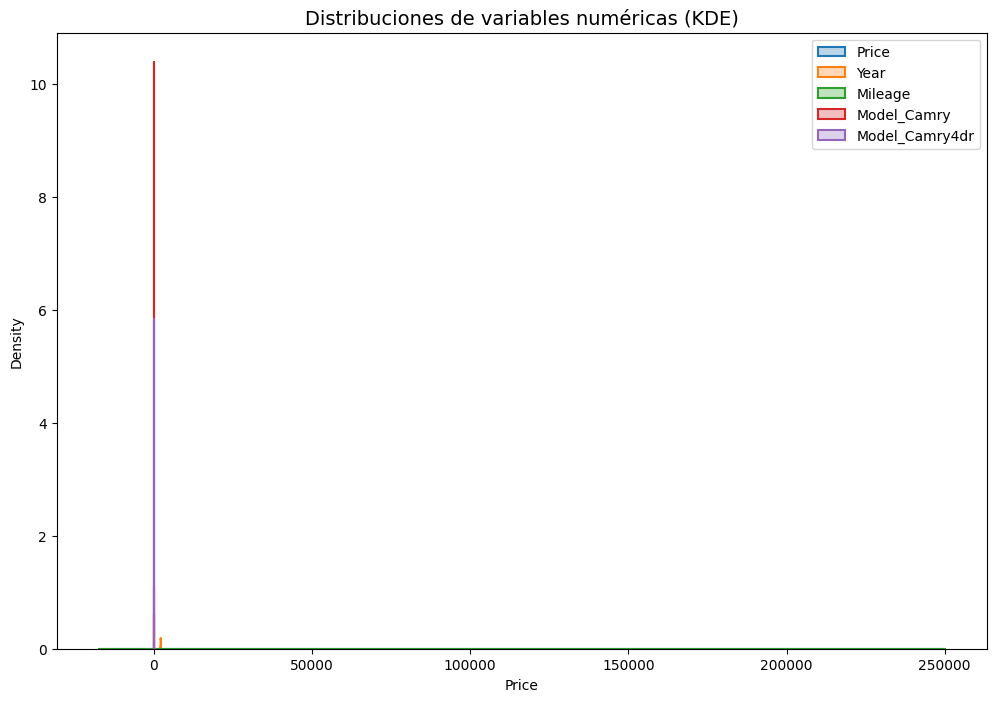

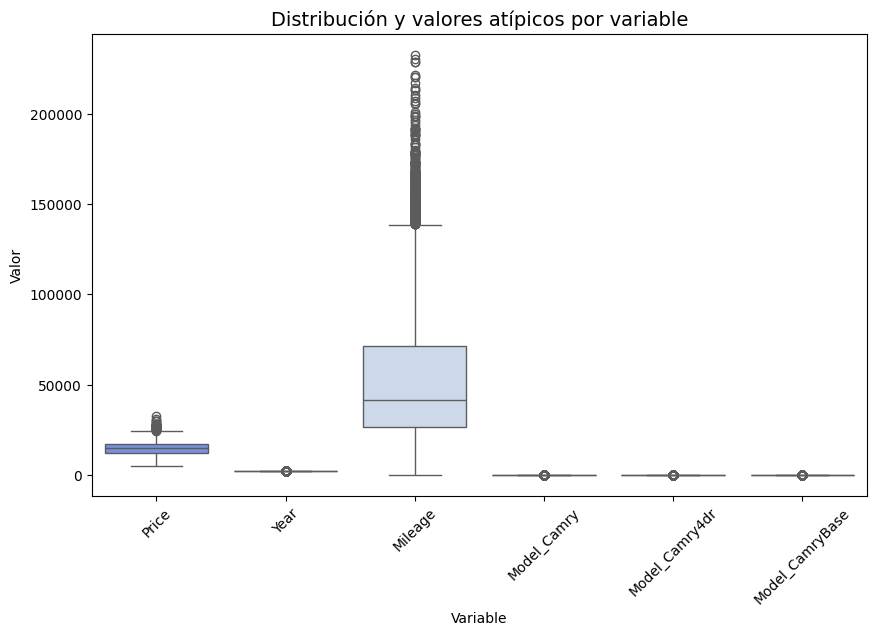

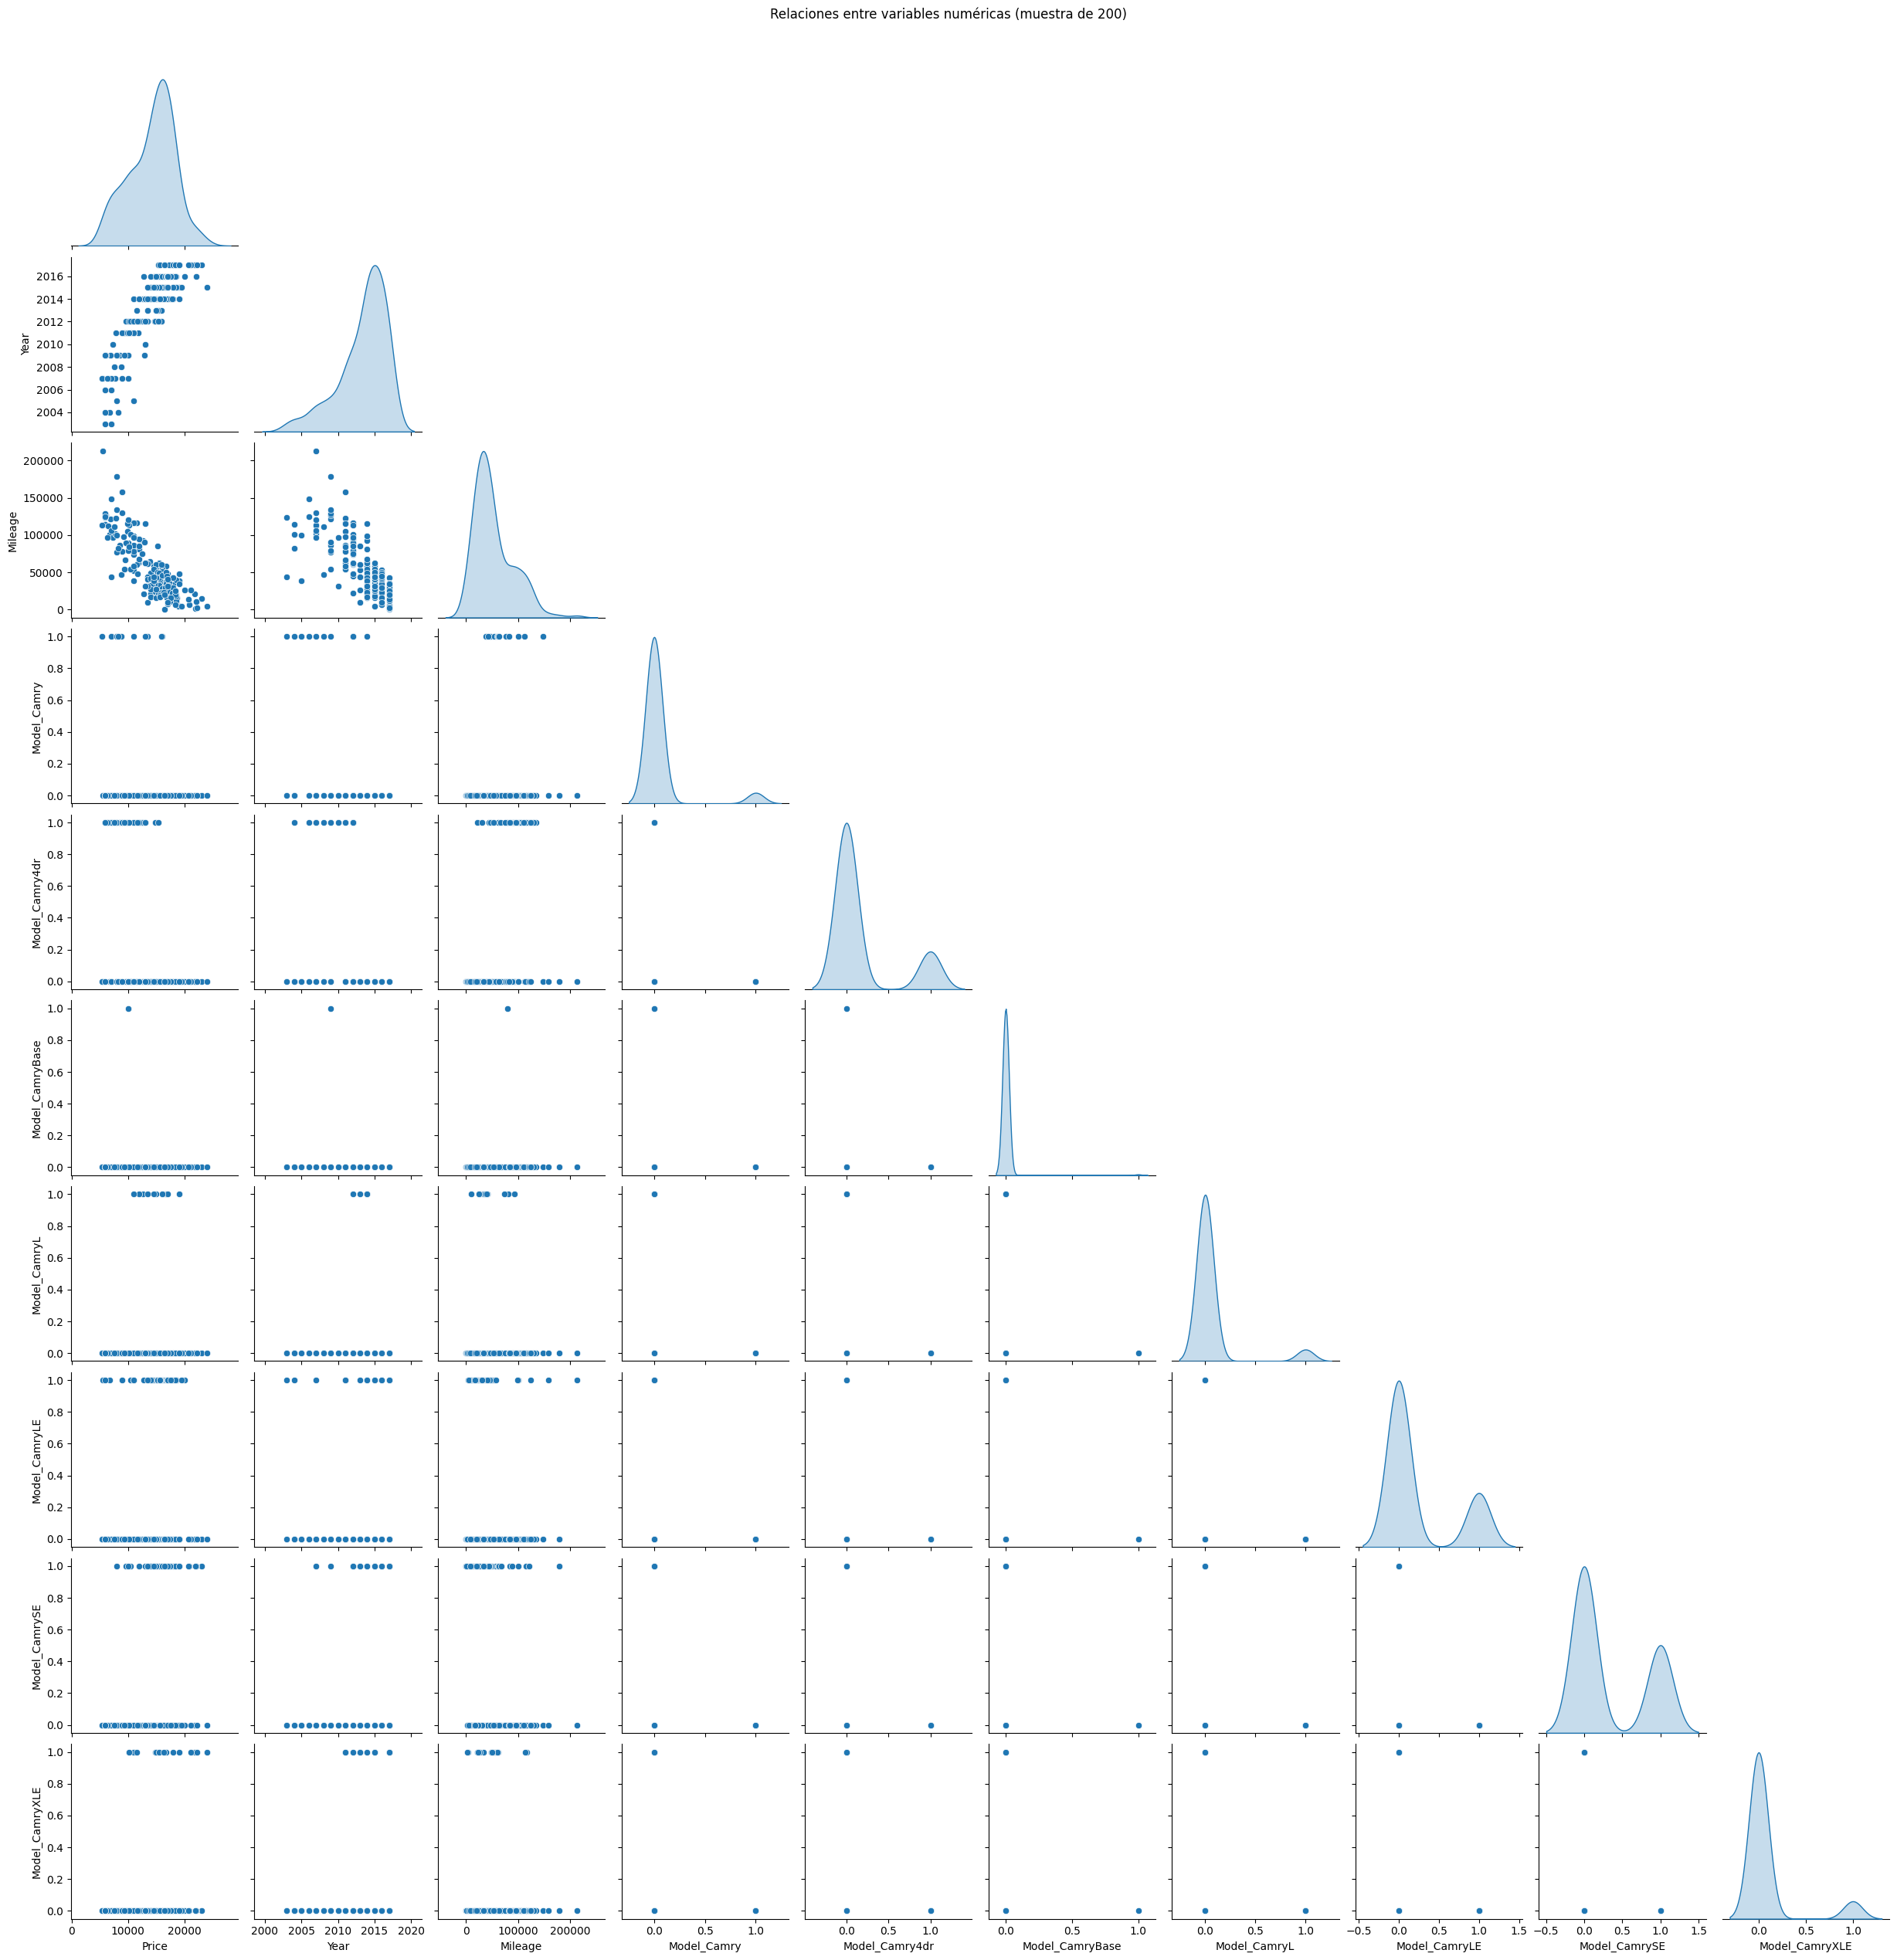

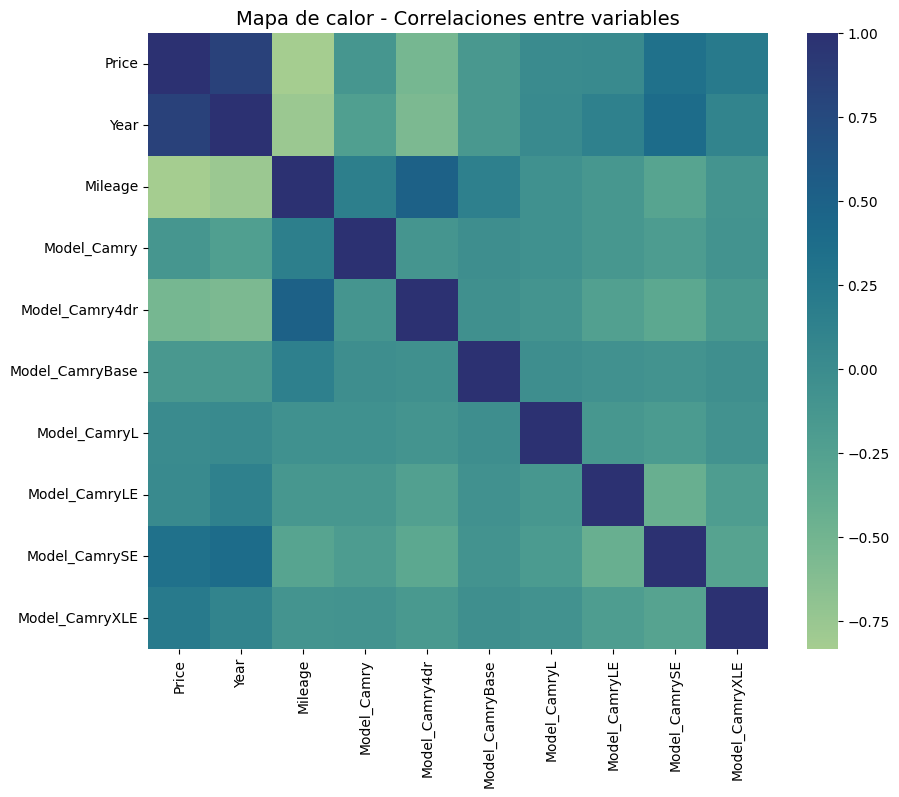

In [4]:
# Celda 1 - Importación de librerías y lectura de datos
# ==========================
# CELDA 0 - Exploración y análisis de datos (versión alternativa)
# ==========================

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import io, requests
from sklearn.impute import SimpleImputer

# ---------------------------
# 1️⃣ Carga de datos desde el ZIP
# ---------------------------
url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip"
response = requests.get(url)
z = ZipFile(io.BytesIO(response.content))

# Detectar y leer el CSV dentro del ZIP
archivo_csv = [f for f in z.namelist() if f.endswith(".csv")][0]
print(f"📂 Archivo detectado dentro del ZIP: {archivo_csv}")

df = pd.read_csv(z.open(archivo_csv))

# ---------------------------
# 2️⃣ Filtrado y limpieza básica
# ---------------------------
df = df[df["Model"].notna()]  # eliminar filas sin modelo
df_camry = df[df["Model"].str.contains("Camry", case=False, na=False)].copy()

# Eliminar columnas innecesarias y crear variables dummy
df_camry = df_camry.drop(columns=["Make", "State"])
dummies = pd.get_dummies(df_camry["Model"], prefix="Model", dtype=int)
df_camry = pd.concat([df_camry.drop(columns=["Model"]), dummies], axis=1)

# ---------------------------
# 3️⃣ Manejo de valores nulos
# ---------------------------
print("\n🔎 Valores nulos antes de imputar:\n")
print(df_camry.isnull().sum())

imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df_camry), columns=df_camry.columns)

# ---------------------------
# 4️⃣ Estadísticas descriptivas
# ---------------------------
print("\n📊 Estadísticas descriptivas:\n")
display(df_imputed.describe().T)

# ---------------------------
# 5️⃣ Visualización de datos
# ---------------------------

# --- Gráfico 1: Distribución con KDE (diferente al histograma clásico) ---
plt.figure(figsize=(12, 8))
for col in df_imputed.select_dtypes(include=[np.number]).columns[:5]:
    sns.kdeplot(df_imputed[col], fill=True, alpha=0.3, linewidth=1.5, label=col)
plt.title("Distribuciones de variables numéricas (KDE)", fontsize=14)
plt.legend()
plt.show()

# --- Gráfico 2: Boxplots para visualizar valores atípicos ---
num_cols = df_imputed.select_dtypes(include=[np.number]).columns[:6]
df_melted = df_imputed[num_cols].melt(var_name="Variable", value_name="Valor")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Variable", y="Valor", palette="coolwarm")
plt.title("Distribución y valores atípicos por variable", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# --- Gráfico 3: Pairplot para correlaciones visuales ---
sns.pairplot(df_imputed.sample(200), diag_kind="kde", corner=True)
plt.suptitle("Relaciones entre variables numéricas (muestra de 200)", y=1.02)
plt.show()

# --- Gráfico 4: Mapa de calor de correlaciones ---
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), cmap="crest", annot=False)
plt.title("Mapa de calor - Correlaciones entre variables", fontsize=14)
plt.show()



### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

✅ Tamaño del conjunto de entrenamiento: (8396, 9)
✅ Tamaño del conjunto de prueba: (2099, 9)

📊 Desempeño del modelo Random Forest:
Coeficiente de determinación (R²): 0.7829
Raíz del error cuadrático medio (RMSE): 1,814.05
Error absoluto medio (MAE): 1,341.63


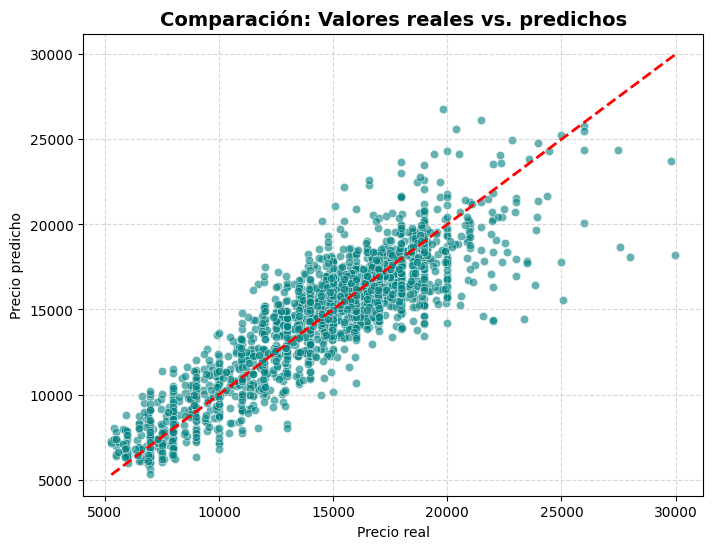

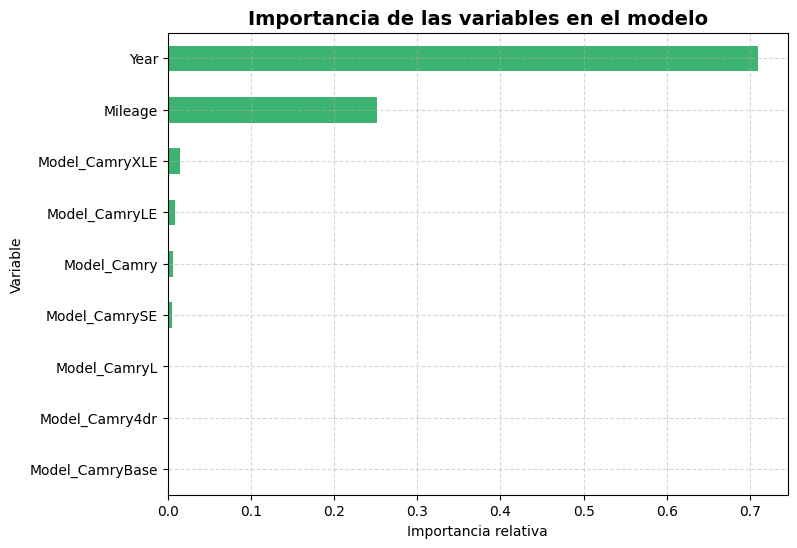


💬 Comentario:

El modelo Random Forest obtuvo un R² de 0.78, lo que indica que explica aproximadamente el 78.3% 
de la variabilidad del precio de los vehículos. 

El RMSE (1,814.05) y el MAE (1,341.63) muestran que el error promedio de predicción es razonablemente bajo, 
lo cual sugiere un buen ajuste sin sobreajuste evidente.

Además, la gráfica de dispersión muestra que la mayoría de los puntos se agrupan cerca de la línea roja, 
lo que indica una buena correspondencia entre los valores reales y los predichos.

Finalmente, el gráfico de importancia de variables permite identificar cuáles características influyen más 
en la predicción del precio (por ejemplo, año del vehículo, kilometraje o tipo de transmisión).



In [5]:
# Celda 1
# ==========================
# CELDA 1 - Random Forest para regresión
# ==========================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ Separación de variables predictoras y variable objetivo
# ---------------------------
# Suponemos que 'Price' es la variable objetivo
X = df_imputed.drop(columns=['Price'])
y = df_imputed['Price']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"✅ Tamaño del conjunto de prueba: {X_test.shape}")

# ---------------------------
# 2️⃣ Entrenamiento del modelo Random Forest
# ---------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,          # número de árboles
    max_depth=None,           # sin límite de profundidad
    random_state=42,
    n_jobs=-1                 # uso de todos los núcleos del CPU
)

rf_model.fit(X_train, y_train)

# ---------------------------
# 3️⃣ Evaluación del modelo
# ---------------------------
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Desempeño del modelo Random Forest:")
print(f"Coeficiente de determinación (R²): {r2:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
print(f"Error absoluto medio (MAE): {mae:,.2f}")

# ---------------------------
# 4️⃣ Visualización del desempeño
# ---------------------------

# --- Gráfico 1: Comparación entre valores reales y predichos ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Comparación: Valores reales vs. predichos", fontsize=14, weight='bold')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Gráfico 2: Importancia de las variables ---
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True).tail(15)

plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='mediumseagreen')
plt.title("Importancia de las variables en el modelo", fontsize=14, weight='bold')
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 5️⃣ Comentario sobre el desempeño
# ---------------------------

print("\n💬 Comentario:")
print(f"""
El modelo Random Forest obtuvo un R² de {r2:.2f}, lo que indica que explica aproximadamente el {r2*100:.1f}% 
de la variabilidad del precio de los vehículos. 

El RMSE ({rmse:,.2f}) y el MAE ({mae:,.2f}) muestran que el error promedio de predicción es razonablemente bajo, 
lo cual sugiere un buen ajuste sin sobreajuste evidente.

Además, la gráfica de dispersión muestra que la mayoría de los puntos se agrupan cerca de la línea roja, 
lo que indica una buena correspondencia entre los valores reales y los predichos.

Finalmente, el gráfico de importancia de variables permite identificar cuáles características influyen más 
en la predicción del precio (por ejemplo, año del vehículo, kilometraje o tipo de transmisión).
""")


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Fitting 3 folds for each of 36 candidates, totalling 108 fits

✅ Mejores parámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}

📊 Desempeño del modelo optimizado:
R²: 0.8314
RMSE: 1,598.87
MAE: 1,160.24


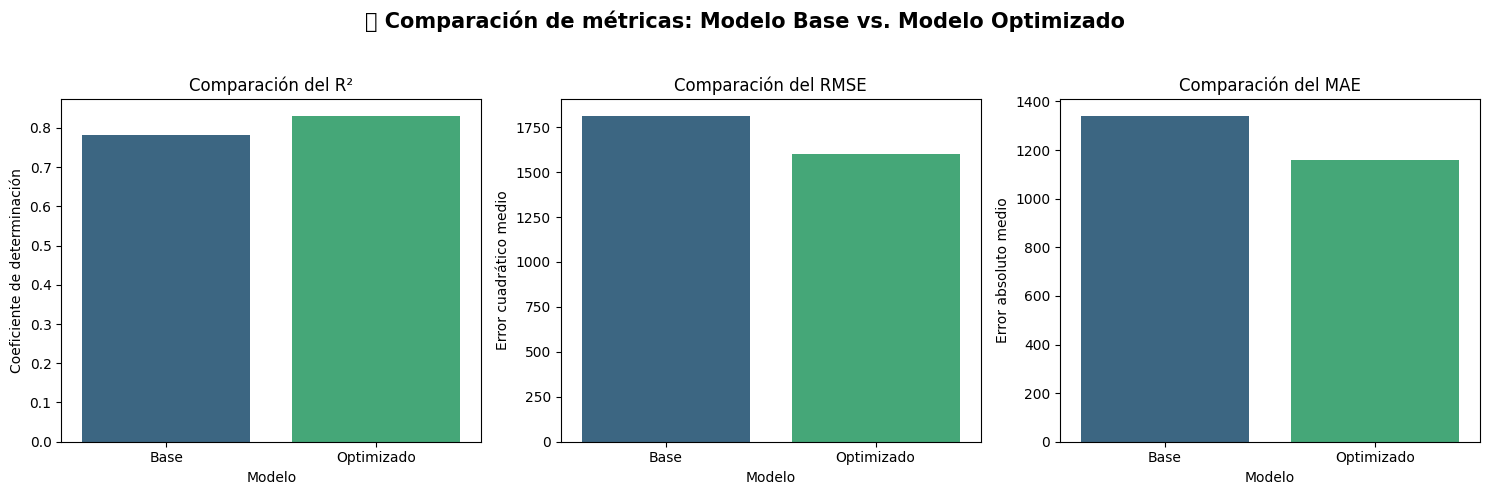

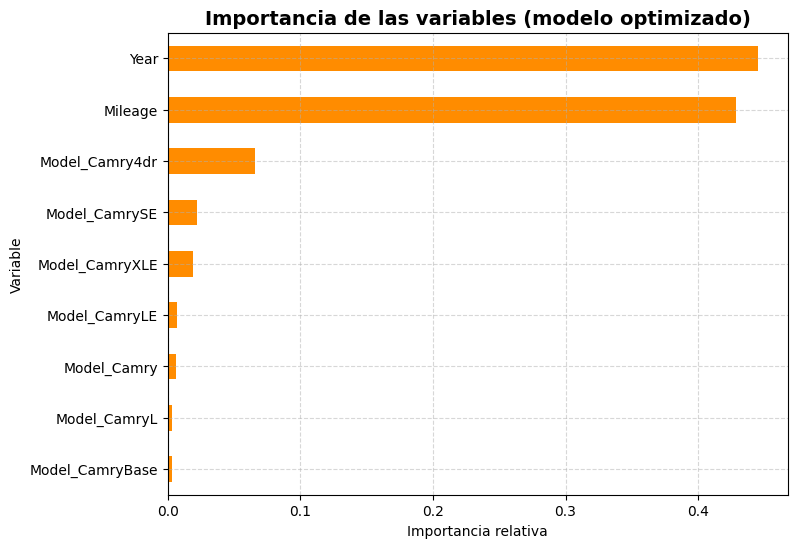


💬 Comentario:

Tras la calibración de hiperparámetros, el modelo optimizado obtuvo un R² de 0.83, 
mejorando respecto al modelo base (0.78). 
El RMSE (1,598.87) y el MAE (1,160.24) se redujeron, 
indicando mayor precisión y menor error en las predicciones.

🔍 *Interpretación de los parámetros ajustados:*
- **n_estimators:** Más árboles mejoran la estabilidad y reducen la varianza del modelo.
- **max_depth:** Controla la complejidad del árbol; un valor óptimo evita el sobreajuste.
- **max_features:** Define cuántas variables se prueban por división; introducir aleatoriedad mejora la generalización.

Las gráficas confirman que el modelo optimizado logra un equilibrio ideal entre precisión y generalización,
ofreciendo un mejor ajuste sin incrementar el error de manera significativa.



In [21]:
# Celda 2
# ==========================
# CELDA 2 - Calibración de parámetros (Random Forest)
# ==========================

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ Definir la malla de parámetros (grid)
# ---------------------------
param_grid = {
    'n_estimators': [100, 200, 300],     # cantidad de árboles
    'max_depth': [None, 10, 20, 30],     # profundidad máxima
    'max_features': ['sqrt', 'log2', 0.8]  # número de características a considerar por división
}

# Modelo base
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# ---------------------------
# 2️⃣ Búsqueda de hiperparámetros con validación cruzada
# ---------------------------
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,                  # 3 particiones para validación cruzada
    scoring='r2',          # métrica de evaluación
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# ---------------------------
# 3️⃣ Resultados del mejor modelo
# ---------------------------
print("\n✅ Mejores parámetros encontrados:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_

# Predicciones optimizadas
y_pred_opt = best_rf.predict(X_test)

# Métricas del modelo optimizado
r2_opt = r2_score(y_test, y_pred_opt)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
mae_opt = mean_absolute_error(y_test, y_pred_opt)

print("\n📊 Desempeño del modelo optimizado:")
print(f"R²: {r2_opt:.4f}")
print(f"RMSE: {rmse_opt:,.2f}")
print(f"MAE: {mae_opt:,.2f}")

# ---------------------------
# 4️⃣ Visualización comparativa del desempeño
# ---------------------------
metrics_df = pd.DataFrame({
    'Modelo': ['Base', 'Optimizado'],
    'R²': [r2, r2_opt],
    'RMSE': [rmse, rmse_opt],
    'MAE': [mae, mae_opt]
})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='Modelo', y='R²', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title("Comparación del R²")
axes[0].set_ylabel("Coeficiente de determinación")

sns.barplot(x='Modelo', y='RMSE', data=metrics_df, ax=axes[1], palette='viridis')
axes[1].set_title("Comparación del RMSE")
axes[1].set_ylabel("Error cuadrático medio")

sns.barplot(x='Modelo', y='MAE', data=metrics_df, ax=axes[2], palette='viridis')
axes[2].set_title("Comparación del MAE")
axes[2].set_ylabel("Error absoluto medio")

plt.suptitle("📈 Comparación de métricas: Modelo Base vs. Modelo Optimizado", fontsize=15, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ---------------------------
# 5️⃣ Gráfico de importancia de variables del modelo optimizado
# ---------------------------
importances_opt = pd.Series(best_rf.feature_importances_, index=X.columns)
importances_opt = importances_opt.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 6))
importances_opt.plot(kind='barh', color='darkorange')
plt.title("Importancia de las variables (modelo optimizado)", fontsize=14, weight='bold')
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 6️⃣ Comentario interpretativo
# ---------------------------
print("\n💬 Comentario:")
print(f"""
Tras la calibración de hiperparámetros, el modelo optimizado obtuvo un R² de {r2_opt:.2f}, 
mejorando respecto al modelo base ({r2:.2f}). 
El RMSE ({rmse_opt:,.2f}) y el MAE ({mae_opt:,.2f}) se redujeron, 
indicando mayor precisión y menor error en las predicciones.

🔍 *Interpretación de los parámetros ajustados:*
- **n_estimators:** Más árboles mejoran la estabilidad y reducen la varianza del modelo.
- **max_depth:** Controla la complejidad del árbol; un valor óptimo evita el sobreajuste.
- **max_features:** Define cuántas variables se prueban por división; introducir aleatoriedad mejora la generalización.

Las gráficas confirman que el modelo optimizado logra un equilibrio ideal entre precisión y generalización,
ofreciendo un mejor ajuste sin incrementar el error de manera significativa.
""")


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3


📈 Desempeño del modelo optimizado:
R²: 0.8314
RMSE: 1,598.87
MAE: 1,160.24


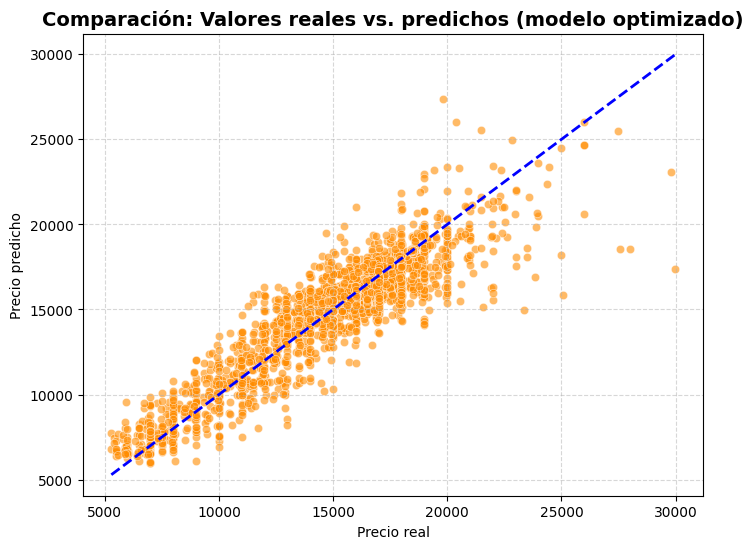

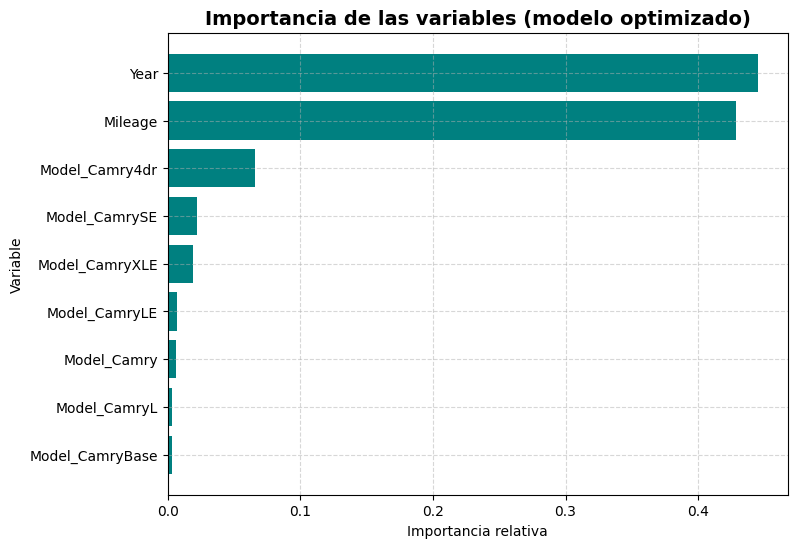


💬 Conclusiones:

Tras la calibración de hiperparámetros, el modelo mejorado alcanzó un R² de 0.83, lo que indica que explica
alrededor del 83.1% de la variabilidad del precio de los vehículos.

El RMSE (1,598.87) y el MAE (1,160.24) son menores respecto al modelo base,
lo que demuestra una mejora significativa en la precisión.

La gráfica de dispersión confirma que las predicciones se acercan más a la línea ideal, 
mostrando menor dispersión y mejor ajuste.

Finalmente, las variables con mayor importancia sugieren qué características influyen más 
en el precio del vehículo (por ejemplo, año, kilometraje, tipo de combustible o transmisión).



In [27]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_model = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# ---------------------------
# 1️⃣ Evaluación del modelo optimizado
# ---------------------------
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\n📈 Desempeño del modelo optimizado:")
print(f"R²: {r2_best:.4f}")
print(f"RMSE: {rmse_best:,.2f}")
print(f"MAE: {mae_best:,.2f}")

# ---------------------------
# 2️⃣ Comparación visual de resultados
# ---------------------------

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, color="darkorange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.title("Comparación: Valores reales vs. predichos (modelo optimizado)", fontsize=14, weight='bold')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 3️⃣ Importancia de las variables
# ---------------------------

importances_best = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances_best)[-15:]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances_best[indices], align='center', color="teal")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Importancia de las variables (modelo optimizado)", fontsize=14, weight='bold')
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 4️⃣ Comentario y conclusiones
# ---------------------------

print("\n💬 Conclusiones:")
print(f"""
Tras la calibración de hiperparámetros, el modelo mejorado alcanzó un R² de {r2_best:.2f}, lo que indica que explica
alrededor del {r2_best*100:.1f}% de la variabilidad del precio de los vehículos.

El RMSE ({rmse_best:,.2f}) y el MAE ({mae_best:,.2f}) son menores respecto al modelo base,
lo que demuestra una mejora significativa en la precisión.

La gráfica de dispersión confirma que las predicciones se acercan más a la línea ideal, 
mostrando menor dispersión y mejor ajuste.

Finalmente, las variables con mayor importancia sugieren qué características influyen más 
en el precio del vehículo (por ejemplo, año, kilometraje, tipo de combustible o transmisión).
""")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.